In [1]:
# csv and numpy packages are imported

import csv as csv 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from pandas import * 
%matplotlib inline 

In [2]:
trip_data_file = open('../nyc_taxi_files/trip_data_1.csv', 'r')
trip_data = csv.reader(trip_data_file)
header_1 = trip_data.next()

trip_dataset = []
for i in range(2000000):
    trip_dataset.append(trip_data.next())

trip_data_file.close()

In [3]:
trip_fare_file = open('../nyc_taxi_files/trip_fare_1.csv', 'r')
trip_fare = csv.reader(trip_fare_file)
header_2 = trip_fare.next()

trip_fare_dataset = []
for i in range(2000000):
    trip_fare_dataset.append(trip_fare.next())

trip_fare_file.close()

In [4]:
tripdata_df = DataFrame(data=trip_dataset, columns=header_1)
tripdata_df['medallion'].unique().size

10867

In [5]:
trip_faredata_df = DataFrame(data=trip_fare_dataset, columns=header_2)
print trip_faredata_df['medallion'].unique().size
trip_faredata_df.columns

10867


Index([u'medallion', u' hack_license', u' vendor_id', u' pickup_datetime',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

In [6]:
tripdata_df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.00,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.50,-74.006683,40.731781,-73.994499,40.75066
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.10,-74.004707,40.73777,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,.70,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.10,-73.97625,40.748528,-74.002586,40.747868


In [7]:
tripdata_df.tail()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1999995,738832866F8EEC8A5284E7CEB18ECE80,23E6CB58321E70D39AE154EBBB20E50A,VTS,1,,2013-01-06 00:45:00,2013-01-06 00:53:00,1,480,2.71,-73.980659,40.750542,-73.953056,40.77507
1999996,CE18FA55EF0D170260DE997388271CBB,8B1FB0FFC7716015B9F5B02030CB92C1,VTS,1,,2013-01-06 00:46:00,2013-01-06 00:51:00,3,300,.79,-73.995232,40.760319,-73.99099,40.761124
1999997,57B6BAE432044564FB7DE5C907B93261,80029AAD3540C25106CCF1F42F77E691,VTS,1,,2013-01-06 00:30:00,2013-01-06 00:52:00,1,1320,5.02,-74.001564,40.735947,-73.954704,40.779118
1999998,D1EE28871EEBF38B3945C52640E8DD63,1F524AD2B65DD5E6FA54FA894CB33EB2,VTS,1,,2013-01-06 00:45:00,2013-01-06 00:51:00,1,360,.94,-73.999809,40.738388,-74.00853,40.728893
1999999,7982155ADD1ADFFE00B91192AAD5C668,2C59B3FD98F6B594D41A5F49E384A173,VTS,1,,2013-01-06 00:45:00,2013-01-06 00:55:00,5,600,3.33,-74.002899,40.734936,-73.987343,40.769501


In [8]:
import time
trip_Pickup_time = tripdata_df['pickup_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_hour)
trip_Pickup_time.dtype

dtype('int64')

In [9]:
trip_Pickup_time.head()

0    15
1     0
2    18
3    23
4    23
Name: pickup_datetime, dtype: int64

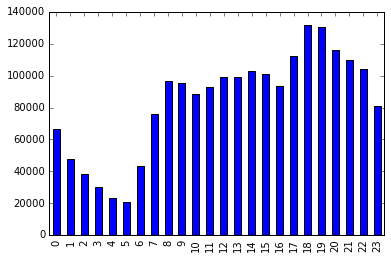

In [10]:
trip_Pickup_time.groupby(trip_Pickup_time.values).size().plot(kind='bar')

In [11]:
trip_Pickup_day = tripdata_df['pickup_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_wday)

0    216473
1    454708
2    445541
3    259894
4    237190
5    226405
6    159789
dtype: int64


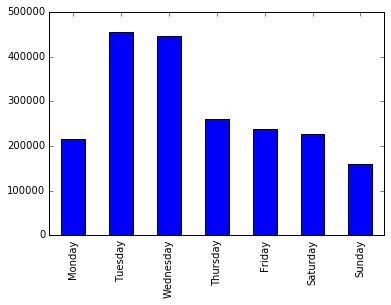

In [12]:
trip_Pickup_day.map({0:'Monday', 1:'Tuesday',2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
trip_Pickup_day_group = trip_Pickup_day.groupby(trip_Pickup_day.values).count()
trip_Pickup_wday_group = DataFrame(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                                  data=trip_Pickup_day_group.values, columns=['No_of_trips'])

print trip_Pickup_day_group
trip_Pickup_wday_group.No_of_trips.plot(kind='bar')

In [13]:
trip_faredata_df['trip_distance'] = tripdata_df['trip_distance']
trip_faredata_df.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0,0.5,0,0,7,1.00
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6,0.5,0.5,0,0,7,1.50
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1,0.5,0,0,7,1.10
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5,0.5,0.5,0,0,6,.70
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0,0,10.5,2.10


In [14]:
tripdata_df[tripdata_df.trip_distance.astype(float) == 0].shape[0]

9729

In [15]:
tripdata_ind_driver = tripdata_df.groupby(['medallion']).size()

Drivers with less than or equal to 7 trips = 4050


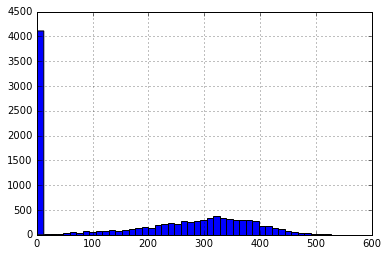

In [16]:
tripdata_ind_driver.hist(bins=50)
print 'Drivers with less than or equal to 7 trips = %d' %tripdata_ind_driver[tripdata_ind_driver.values <= 5].count()

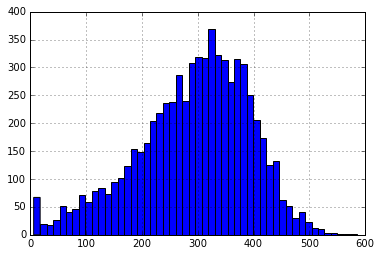

In [17]:
tripdata_ind_driver_filtered = tripdata_ind_driver[tripdata_ind_driver.values > 5]
tripdata_ind_driver_filtered.hist(bins=50)

In [18]:
tripdata_df_filtered = tripdata_df[tripdata_df['medallion'].isin(tripdata_ind_driver_filtered.index)]
#print tripdata_df_filtered.head()
tripdata_df_filtered[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']] = tripdata_df_filtered[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].astype(float)
print 'No of rows with no location information = %d' %tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] == 0].shape[0]

C:\Users\Anirban\Anaconda2\lib\site-packages\pandas\core\frame.py:2320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


No of rows with no location information = 34426


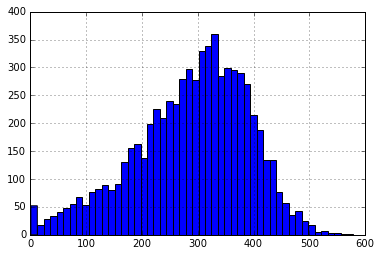

In [19]:
tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] != 0].groupby('medallion').size().hist(bins=50)

In [20]:
tripdata_df_filtered.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code              object
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count        object
trip_time_in_secs      object
trip_distance          object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

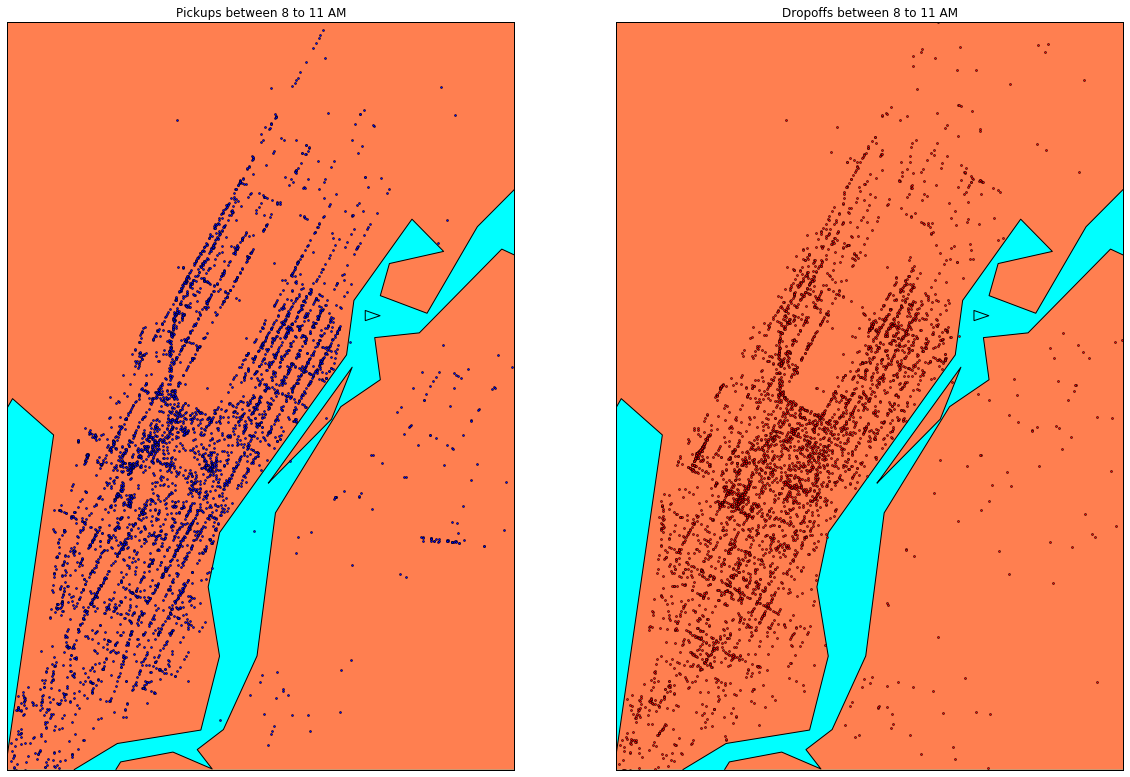

In [23]:
fig = plt.figure(figsize=(20,20))

    
map = Basemap(projection='merc', lat_0=40.7128, lon_0=-74.0059,
    resolution = 'h', area_thresh = 0.001,
    llcrnrlon=-74.018629, llcrnrlat=40.704889,
    urcrnrlon=-73.905500, urcrnrlat=40.831201)

# Pickup map
ax1 = fig.add_subplot(121)
ax1.set_title('Pickups between 8 to 11 AM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

pickup_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] != 0][['pickup_datetime','pickup_longitude','pickup_latitude']], 
                  columns=['pickup_datetime','pickup_longitude','pickup_latitude'])
count = 1

for index, row in pickup_df.iterrows():
    if count > 5000:
        break
    pickup_time = time.strptime(row['pickup_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((pickup_time >= 8) and (pickup_time<=10)):
        x1,y1 = map(row['pickup_longitude'], row['pickup_latitude'])
        map.plot(x1, y1, 'bo', markersize=2)
        count += 1 

# Dropoff map 
ax2 = fig.add_subplot(122)
ax2.set_title('Dropoffs between 8 to 11 AM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

dropoff_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['dropoff_longitude'] != 0][['dropoff_datetime','dropoff_longitude','dropoff_latitude']], 
                  columns=['dropoff_datetime','dropoff_longitude','dropoff_latitude'])
count = 1
for index, row in dropoff_df.iterrows():
    if count > 5000:
        break
    dropoff_time = time.strptime(row['dropoff_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((dropoff_time >= 8) and (dropoff_time<=10)):
        x1,y1 = map(row['dropoff_longitude'], row['dropoff_latitude'])
        map.plot(x1, y1, 'ro', markersize=2)
        count += 1
    
plt.show()

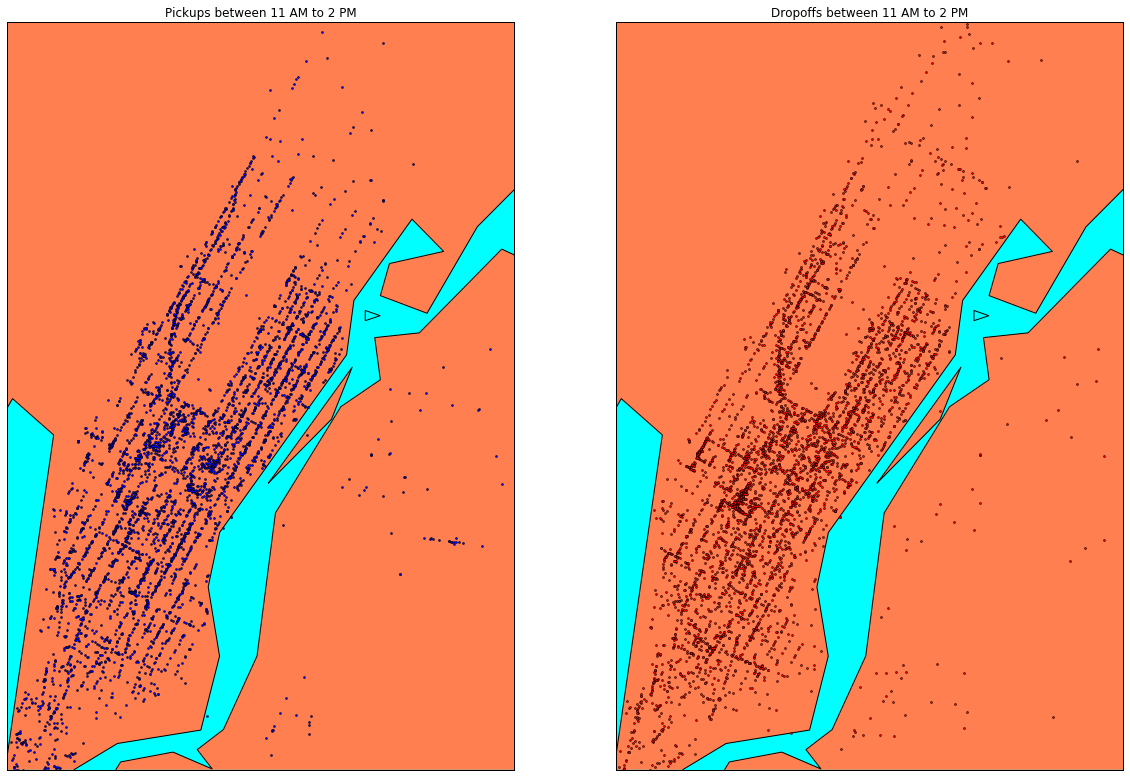

In [25]:
fig = plt.figure(figsize=(20,20))
    
map = Basemap(projection='merc', lat_0=40.7128, lon_0=-74.0059,
    resolution = 'h', area_thresh = 0.001,
    llcrnrlon=-74.018629, llcrnrlat=40.704889,
    urcrnrlon=-73.905500, urcrnrlat=40.831201)

# Pickup map
ax1 = fig.add_subplot(121)
ax1.set_title('Pickups between 11 AM to 2 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

pickup_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] != 0][['pickup_datetime','pickup_longitude','pickup_latitude']], 
                  columns=['pickup_datetime','pickup_longitude','pickup_latitude'])
count = 1

for index, row in pickup_df.iterrows():
    if count > 5000:
        break
    pickup_time = time.strptime(row['pickup_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((pickup_time >= 11) and (pickup_time<=13)):
        x1,y1 = map(row['pickup_longitude'], row['pickup_latitude'])
        map.plot(x1, y1, 'bo', markersize=2)
        count += 1 

# Dropoff map 
ax2 = fig.add_subplot(122)
ax2.set_title('Dropoffs between 11 AM to 2 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

dropoff_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['dropoff_longitude'] != 0][['dropoff_datetime','dropoff_longitude','dropoff_latitude']], 
                  columns=['dropoff_datetime','dropoff_longitude','dropoff_latitude'])
count = 1
for index, row in dropoff_df.iterrows():
    if count > 5000:
        break
    dropoff_time = time.strptime(row['dropoff_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((dropoff_time >= 11) and (dropoff_time<=13)):
        x1,y1 = map(row['dropoff_longitude'], row['dropoff_latitude'])
        map.plot(x1, y1, 'ro', markersize=2)
        count += 1
    
plt.show()

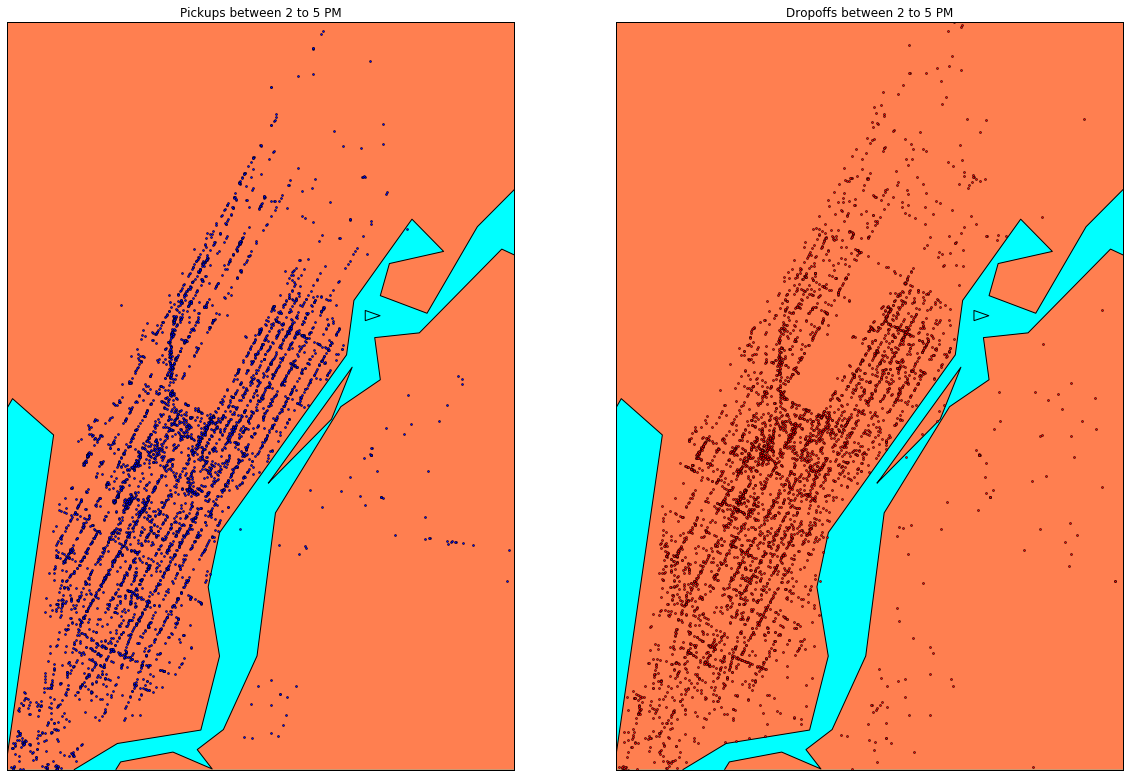

In [26]:
fig = plt.figure(figsize=(20,20))
    
map = Basemap(projection='merc', lat_0=40.7128, lon_0=-74.0059,
    resolution = 'h', area_thresh = 0.001,
    llcrnrlon=-74.018629, llcrnrlat=40.704889,
    urcrnrlon=-73.905500, urcrnrlat=40.831201)

# Pickup map
ax1 = fig.add_subplot(121)
ax1.set_title('Pickups between 2 to 5 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

pickup_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] != 0][['pickup_datetime','pickup_longitude','pickup_latitude']], 
                  columns=['pickup_datetime','pickup_longitude','pickup_latitude'])
count = 1

for index, row in pickup_df.iterrows():
    if count > 5000:
        break
    pickup_time = time.strptime(row['pickup_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((pickup_time >= 14) and (pickup_time<=16)):
        x1,y1 = map(row['pickup_longitude'], row['pickup_latitude'])
        map.plot(x1, y1, 'bo', markersize=2)
        count += 1 

# Dropoff map 
ax2 = fig.add_subplot(122)
ax2.set_title('Dropoffs between 2 to 5 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

dropoff_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['dropoff_longitude'] != 0][['dropoff_datetime','dropoff_longitude','dropoff_latitude']], 
                  columns=['dropoff_datetime','dropoff_longitude','dropoff_latitude'])
count = 1
for index, row in dropoff_df.iterrows():
    if count > 5000:
        break
    dropoff_time = time.strptime(row['dropoff_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((dropoff_time >= 14) and (dropoff_time<=16)):
        x1,y1 = map(row['dropoff_longitude'], row['dropoff_latitude'])
        map.plot(x1, y1, 'ro', markersize=2)
        count += 1
    
plt.show()

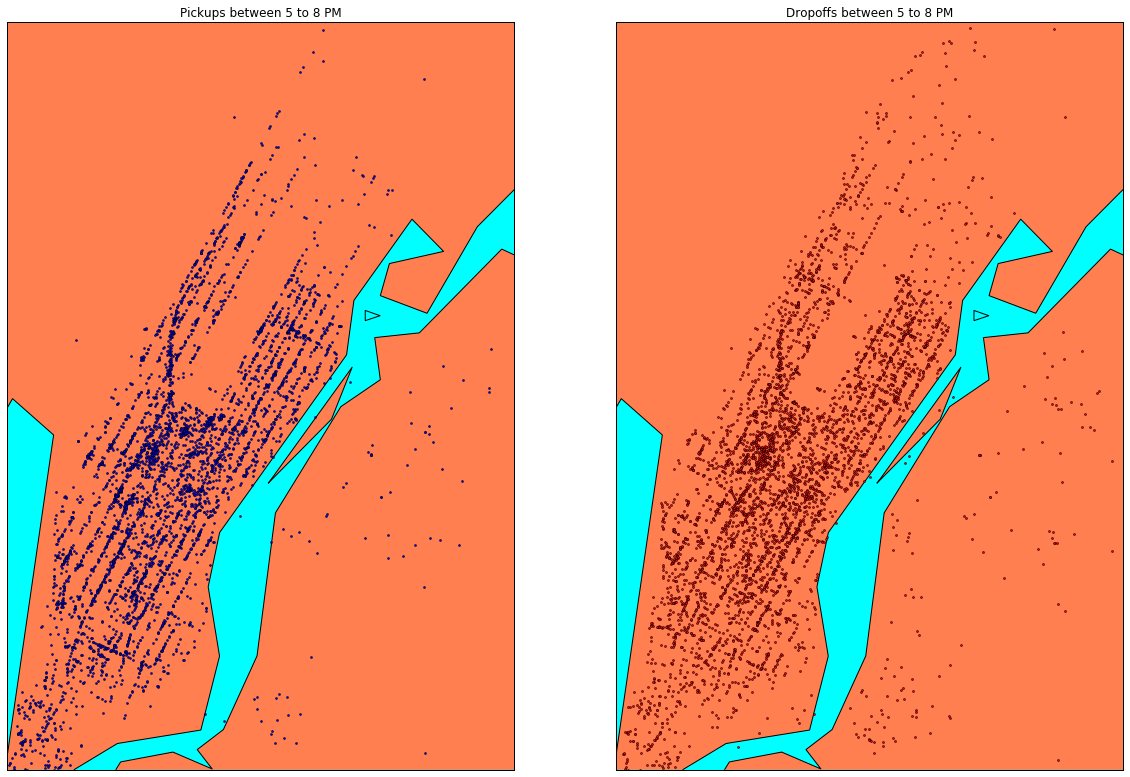

In [28]:
fig = plt.figure(figsize=(20,20))
    
map = Basemap(projection='merc', lat_0=40.7128, lon_0=-74.0059,
    resolution = 'h', area_thresh = 0.001,
    llcrnrlon=-74.018629, llcrnrlat=40.704889,
    urcrnrlon=-73.905500, urcrnrlat=40.831201)

# Pickup map
ax1 = fig.add_subplot(121)
ax1.set_title('Pickups between 5 to 8 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

pickup_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] != 0][['pickup_datetime','pickup_longitude','pickup_latitude']], 
                  columns=['pickup_datetime','pickup_longitude','pickup_latitude'])
count = 1

for index, row in pickup_df.iterrows():
    if count > 5000:
        break
    pickup_time = time.strptime(row['pickup_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((pickup_time >= 17) and (pickup_time<=19)):
        x1,y1 = map(row['pickup_longitude'], row['pickup_latitude'])
        map.plot(x1, y1, 'bo', markersize=2)
        count += 1 

# Dropoff map 
ax2 = fig.add_subplot(122)
ax2.set_title('Dropoffs between 5 to 8 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

dropoff_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['dropoff_longitude'] != 0][['dropoff_datetime','dropoff_longitude','dropoff_latitude']], 
                  columns=['dropoff_datetime','dropoff_longitude','dropoff_latitude'])
count = 1
for index, row in dropoff_df.iterrows():
    if count > 5000:
        break
    dropoff_time = time.strptime(row['dropoff_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((dropoff_time >= 17) and (dropoff_time<=19)):
        x1,y1 = map(row['dropoff_longitude'], row['dropoff_latitude'])
        map.plot(x1, y1, 'ro', markersize=2)
        count += 1
    
plt.show()

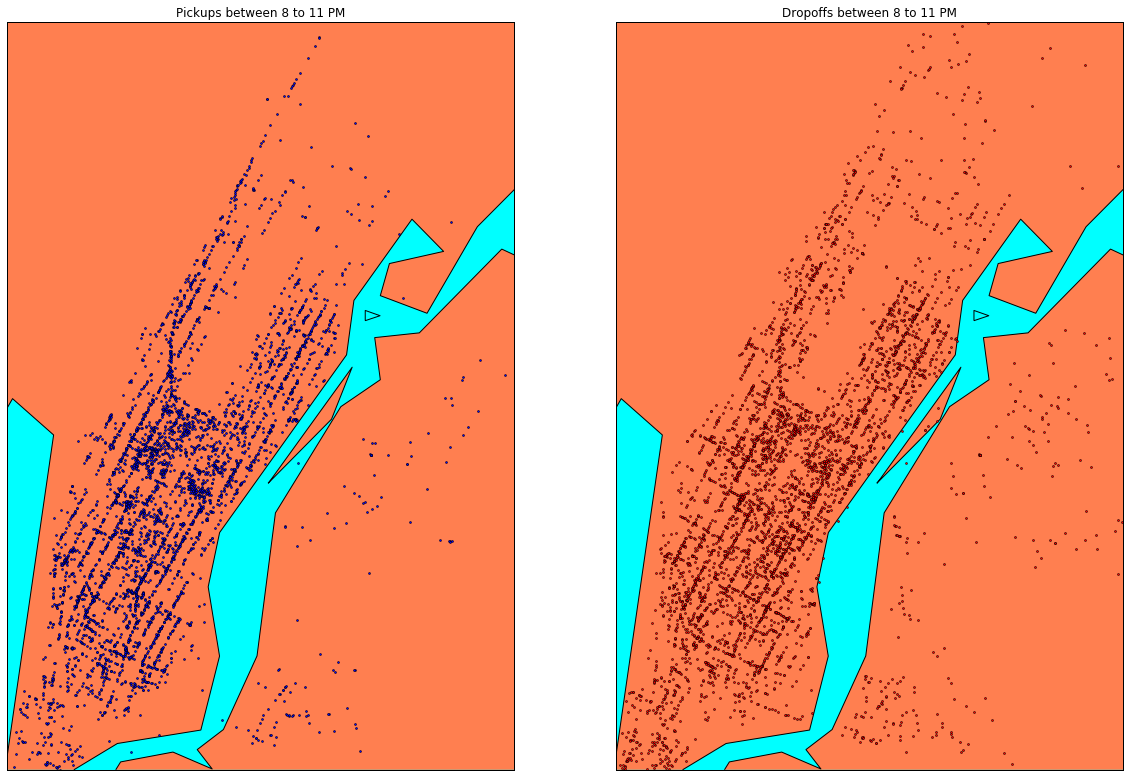

In [27]:
fig = plt.figure(figsize=(20,20))
    
map = Basemap(projection='merc', lat_0=40.7128, lon_0=-74.0059,
    resolution = 'h', area_thresh = 0.001,
    llcrnrlon=-74.018629, llcrnrlat=40.704889,
    urcrnrlon=-73.905500, urcrnrlat=40.831201)

# Pickup map
ax1 = fig.add_subplot(121)
ax1.set_title('Pickups between 8 to 11 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

pickup_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['pickup_longitude'] != 0][['pickup_datetime','pickup_longitude','pickup_latitude']], 
                  columns=['pickup_datetime','pickup_longitude','pickup_latitude'])
count = 1

for index, row in pickup_df.iterrows():
    if count > 5000:
        break
    pickup_time = time.strptime(row['pickup_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((pickup_time >= 20) and (pickup_time<=22)):
        x1,y1 = map(row['pickup_longitude'], row['pickup_latitude'])
        map.plot(x1, y1, 'bo', markersize=2)
        count += 1 

# Dropoff map 
ax2 = fig.add_subplot(122)
ax2.set_title('Dropoffs between 8 to 11 PM')

map.drawcoastlines()
map.drawcountries()
map.drawrivers()
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

dropoff_df = DataFrame(data=tripdata_df_filtered[tripdata_df_filtered['dropoff_longitude'] != 0][['dropoff_datetime','dropoff_longitude','dropoff_latitude']], 
                  columns=['dropoff_datetime','dropoff_longitude','dropoff_latitude'])
count = 1
for index, row in dropoff_df.iterrows():
    if count > 5000:
        break
    dropoff_time = time.strptime(row['dropoff_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
    if ((dropoff_time >= 20) and (dropoff_time<=22)):
        x1,y1 = map(row['dropoff_longitude'], row['dropoff_latitude'])
        map.plot(x1, y1, 'ro', markersize=2)
        count += 1
    
plt.show()

In [82]:
trip_faredata_df.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0,0.5,0,0,7,1.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6,0.5,0.5,0,0,7,1.5
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1,0.5,0,0,7,1.1
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5,0.5,0.5,0,0,6,0.7
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0,0,10.5,2.1


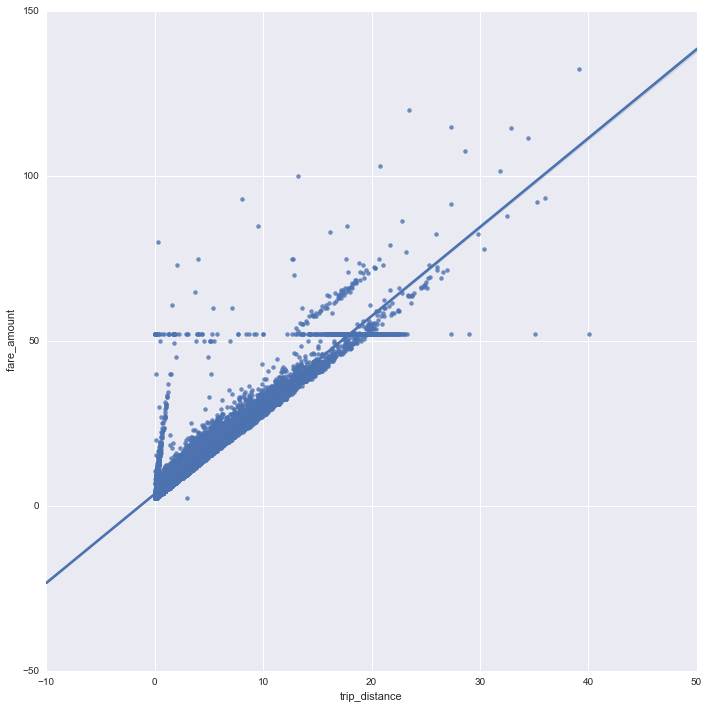

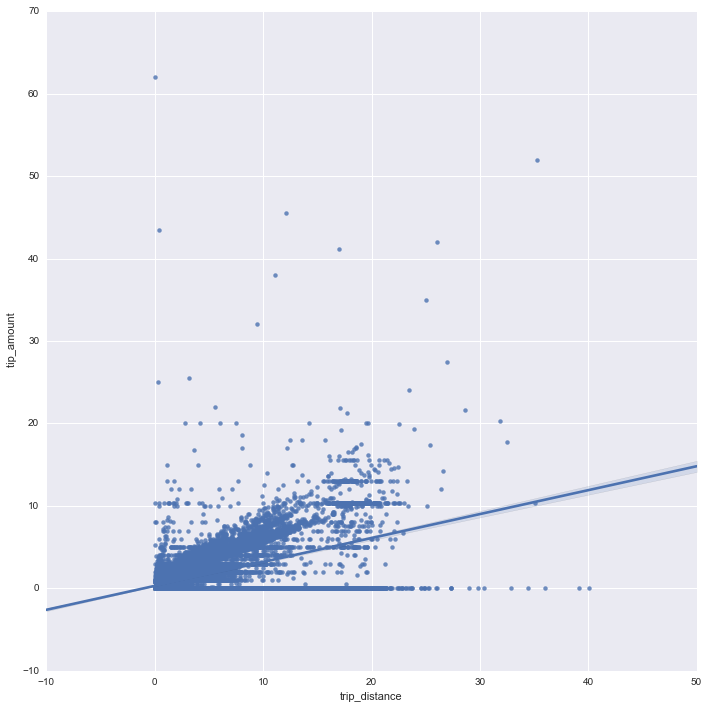

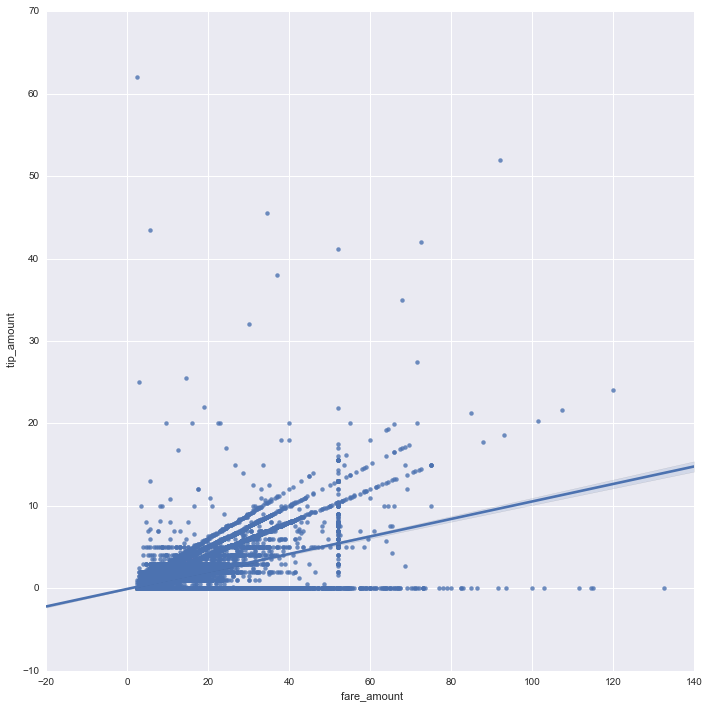

In [89]:
trip_faredata_df['trip_distance'] = trip_faredata_df['trip_distance'].astype(float)
trip_faredata_df[' fare_amount'] = trip_faredata_df[' fare_amount'].astype(float)
trip_faredata_df[' tip_amount'] = trip_faredata_df[' tip_amount'].astype(float)
trip_faredata_df[' total_amount'] = trip_faredata_df[' total_amount'].astype(float)

fare_data_head = trip_faredata_df.head(50000)

import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

sns.lmplot('trip_distance', ' fare_amount', fare_data_head[fare_data_head.trip_distance > 0],size = 10)
sns.lmplot('trip_distance', ' tip_amount', fare_data_head[fare_data_head.trip_distance > 0],size = 10)
sns.lmplot(' fare_amount', ' tip_amount', fare_data_head[fare_data_head.trip_distance > 0],size = 10)

C:\Users\Anirban\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


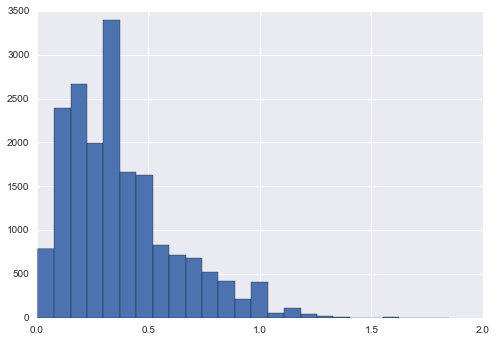

In [90]:
fare_data_head['tip_amount_log'] = fare_data_head[' tip_amount'].apply(np.log10)

fare_data_head[fare_data_head['tip_amount_log'] > 0]['tip_amount_log'].hist(bins=25)